        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

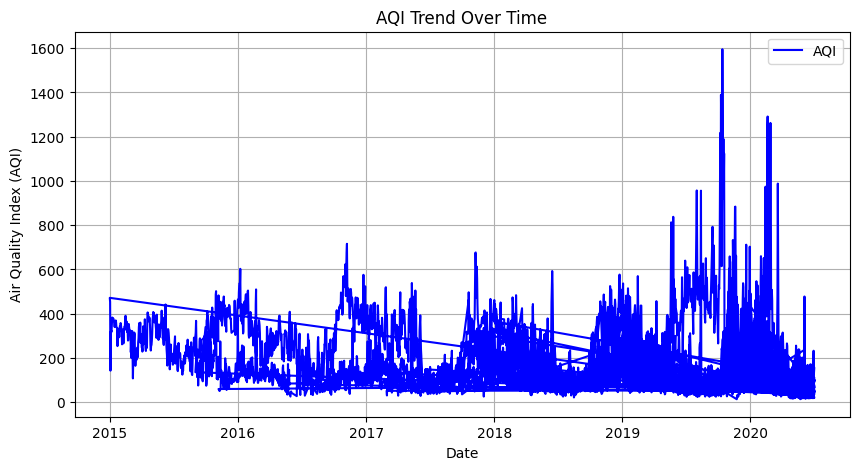

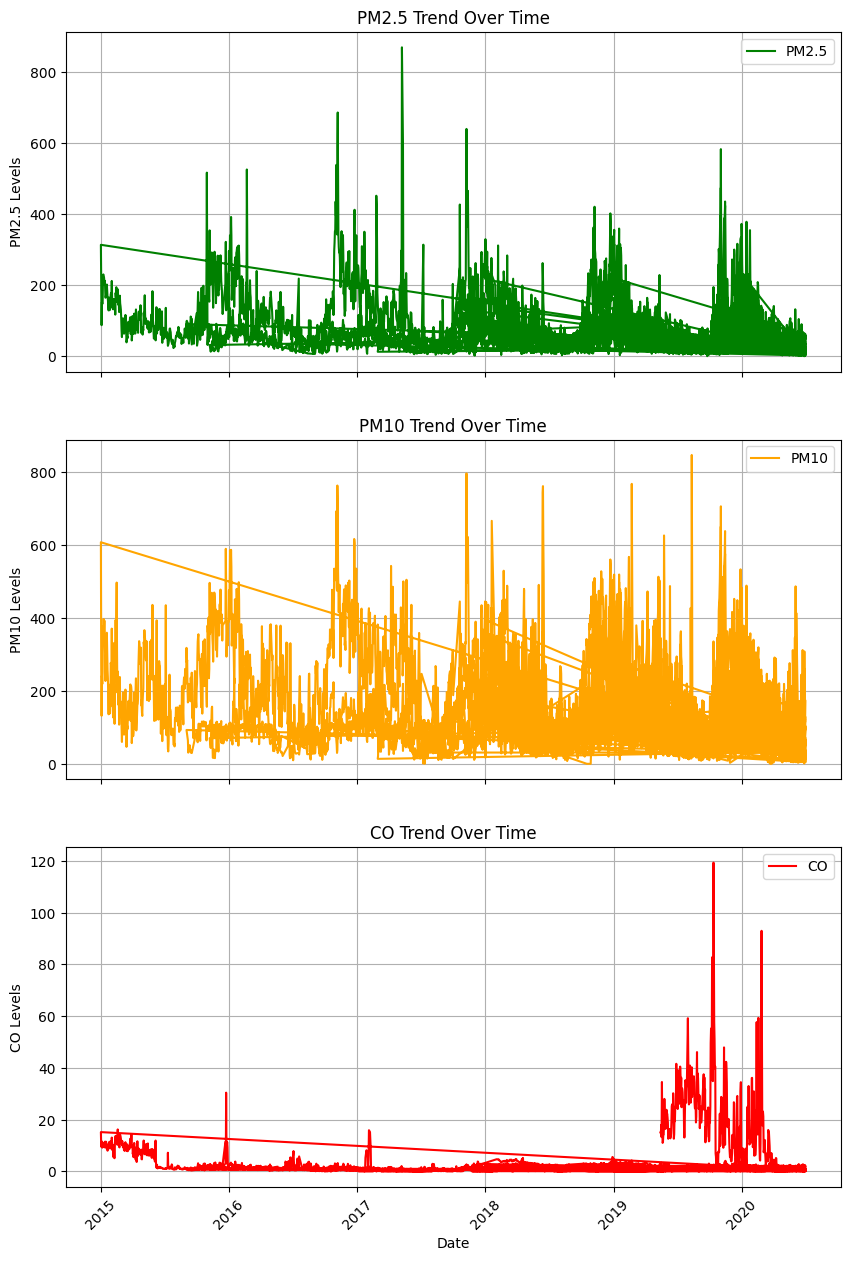

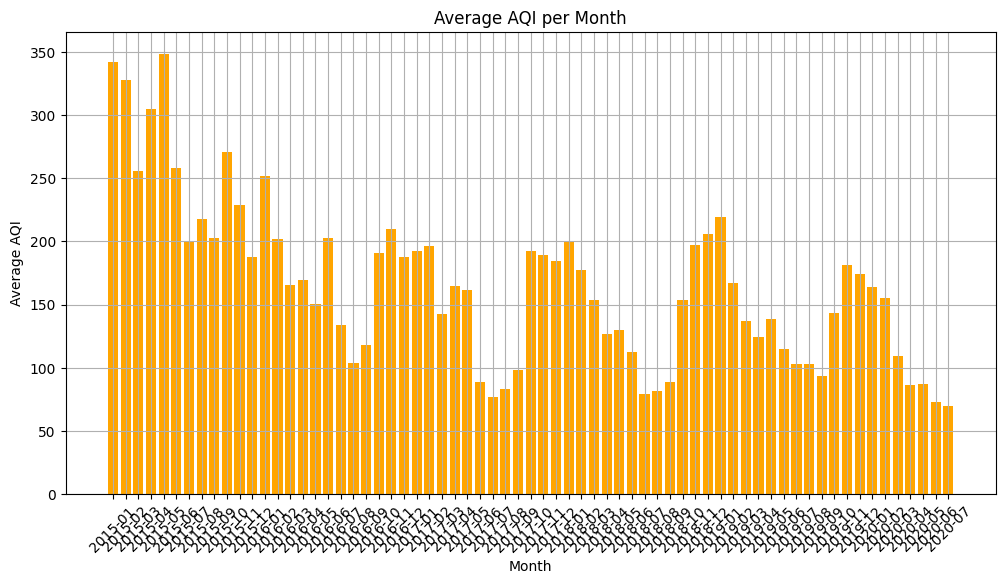

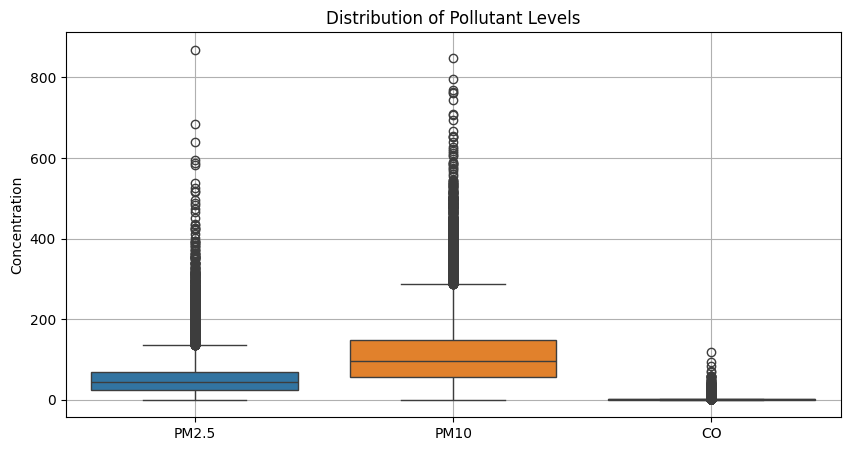

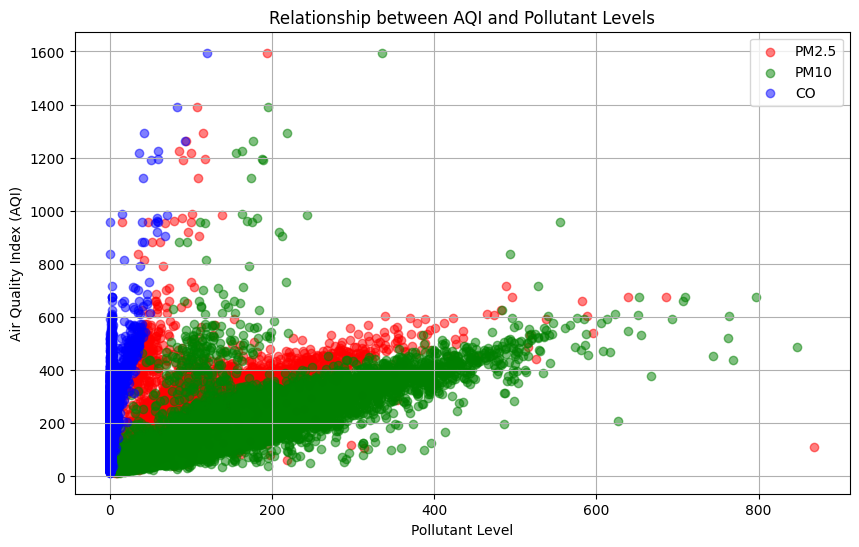

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Import and explore the dataset
data = pd.read_csv('City_Air_Quality.csv')
print(data.head())
print(data.info())

# 2. Preprocess the data (Handle missing values)
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'PM2.5', 'PM10', 'CO', 'AQI']].dropna()  # Drop rows with NaN in critical columns

# 3. Create a time-series line plot for AQI trend
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['AQI'], label='AQI', color='blue')
plt.xlabel('Date')
plt.ylabel('Air Quality Index (AQI)')
plt.title('AQI Trend Over Time')
plt.legend()
plt.grid(True)
plt.show()

# 4. Subplot layout for individual pollutants over time
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
pollutants = ['PM2.5', 'PM10', 'CO']
colors = ['green', 'orange', 'red']

for i, pollutant in enumerate(pollutants):
    axs[i].plot(data['Date'], data[pollutant], label=pollutant, color=colors[i])
    axs[i].set_title(f'{pollutant} Trend Over Time')
    axs[i].set_ylabel(f'{pollutant} Levels')
    axs[i].legend()
    axs[i].grid(True)

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

# 5. Bar plot for average AQI per month
data['Month'] = data['Date'].dt.to_period('M')
avg_aqi_per_month = data.groupby('Month')['AQI'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(avg_aqi_per_month['Month'].astype(str), avg_aqi_per_month['AQI'], color='orange')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.title('Average AQI per Month')
plt.grid(True)
plt.show()

# 6. Box plot for pollutant distribution
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['PM2.5', 'PM10', 'CO']])
plt.title('Distribution of Pollutant Levels')
plt.ylabel('Concentration')
plt.grid(True)
plt.show()

# 7. Scatter plot for AQI and pollutant levels with color maps for clarity
plt.figure(figsize=(10, 6))
plt.scatter(data['PM2.5'], data['AQI'], label='PM2.5', alpha=0.5, color='red')
plt.scatter(data['PM10'], data['AQI'], label='PM10', alpha=0.5, color='green')
plt.scatter(data['CO'], data['AQI'], label='CO', alpha=0.5, color='blue')
plt.xlabel('Pollutant Level')
plt.ylabel('Air Quality Index (AQI)')
plt.title('Relationship between AQI and Pollutant Levels')
plt.legend()
plt.grid(True)
plt.show()


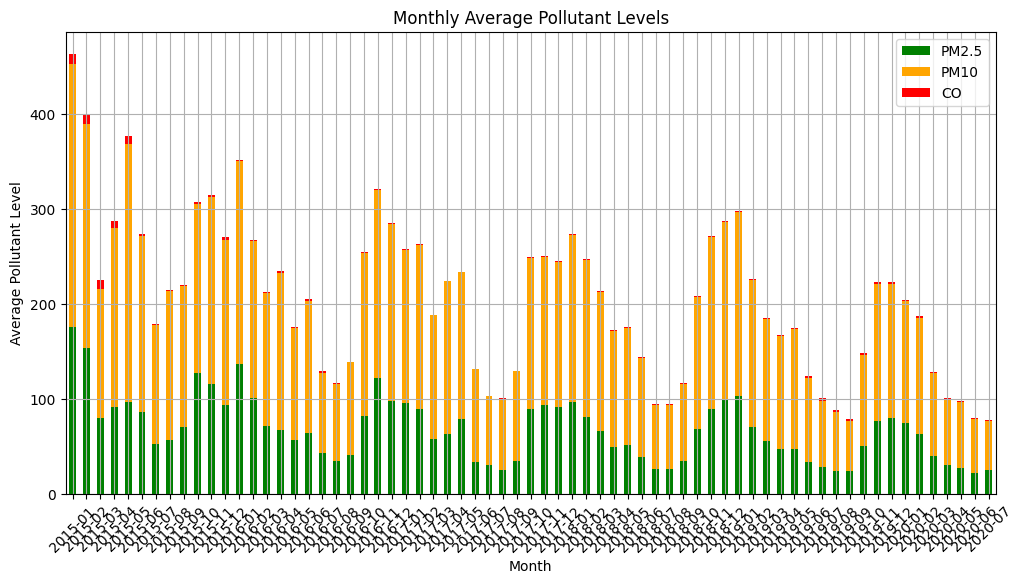

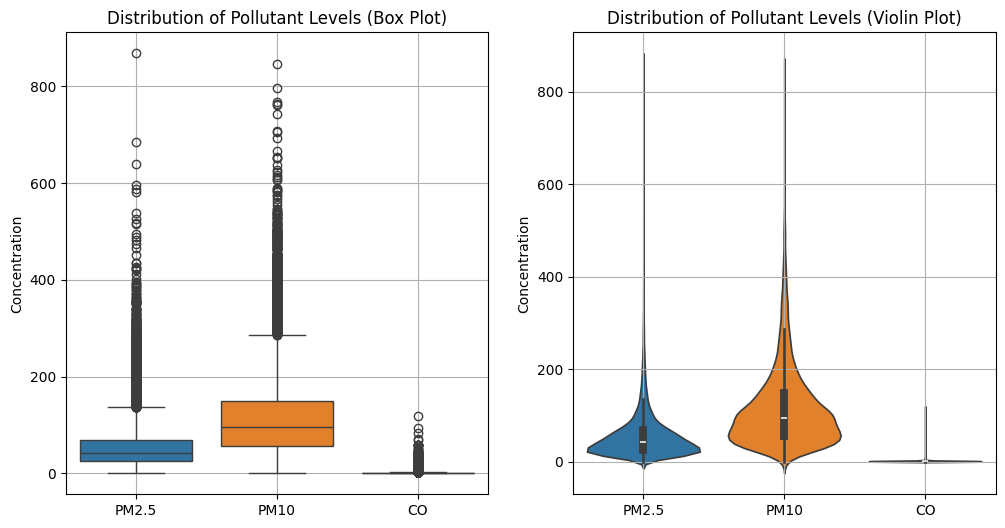

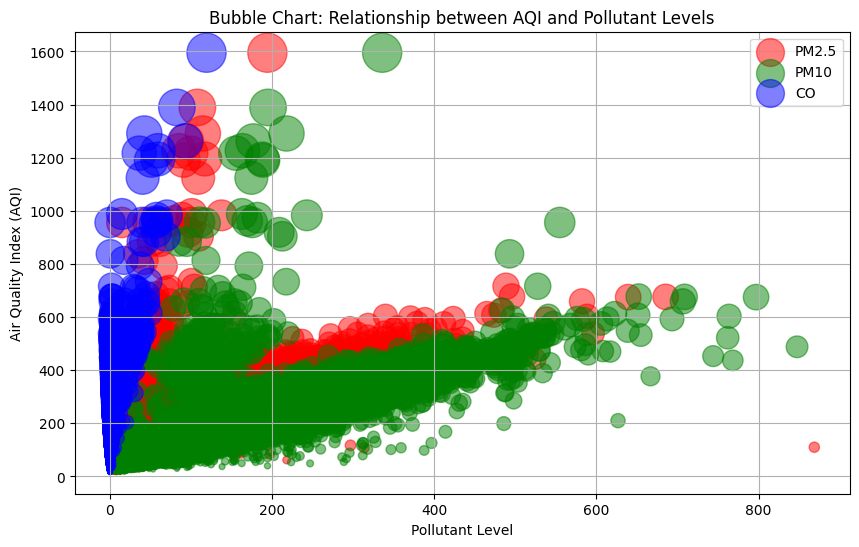

In [2]:
# Stacked bar plot for pollutant levels contributing to AQI per month
data['Month'] = data['Date'].dt.to_period('M')
monthly_avg = data.groupby('Month')[['PM2.5', 'PM10', 'CO']].mean().reset_index()
monthly_avg.set_index('Month', inplace=True)

monthly_avg.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'orange', 'red'])
plt.title('Monthly Average Pollutant Levels')
plt.xlabel('Month')
plt.ylabel('Average Pollutant Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Box and Violin plot for pollutant distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data[['PM2.5', 'PM10', 'CO']])
plt.title('Distribution of Pollutant Levels (Box Plot)')
plt.ylabel('Concentration')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.violinplot(data=data[['PM2.5', 'PM10', 'CO']])
plt.title('Distribution of Pollutant Levels (Violin Plot)')
plt.ylabel('Concentration')
plt.grid(True)
plt.show()

# Bubble chart for AQI vs. pollutant levels
plt.figure(figsize=(10, 6))
plt.scatter(data['PM2.5'], data['AQI'], s=data['AQI']*0.5, alpha=0.5, color='red', label='PM2.5')
plt.scatter(data['PM10'], data['AQI'], s=data['AQI']*0.5, alpha=0.5, color='green', label='PM10')
plt.scatter(data['CO'], data['AQI'], s=data['AQI']*0.5, alpha=0.5, color='blue', label='CO')
plt.xlabel('Pollutant Level')
plt.ylabel('Air Quality Index (AQI)')
plt.title('Bubble Chart: Relationship between AQI and Pollutant Levels')
plt.legend()
plt.grid(True)
plt.show()